## K-nearest neighbords

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [4]:
breast_cancer_data = pd.read_csv(r'datasets\breast-cancer.csv')
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
breast_cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

C:\Users\Bikesh Khyaju\AppData\Local\Temp\ipykernel_23468\3892725913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= breast_cancer_data['diagnosis'], palette='coolwarm')


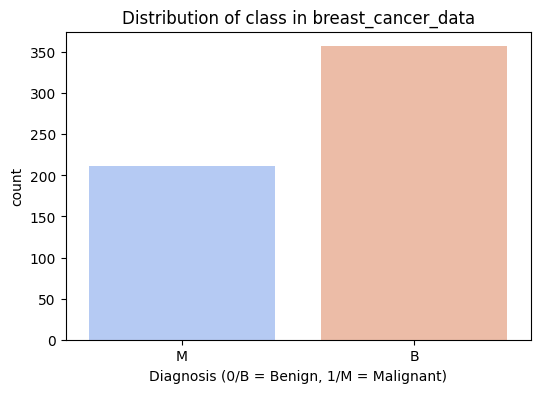

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x= breast_cancer_data['diagnosis'], palette='coolwarm')
plt.title('Distribution of class in breast_cancer_data')
plt.xlabel('Diagnosis (0/B = Benign, 1/M = Malignant)')
plt.ylabel('count')
plt.show()

In [7]:
breast_cancer_data.drop(columns='id', inplace=True)

In [8]:
# Encoding the target variable using LabelEncoder
label_encoder = LabelEncoder()
breast_cancer_data['diagnosis'] = label_encoder.fit_transform(breast_cancer_data['diagnosis'])

# Splitting featuer 

X_bc = breast_cancer_data.drop(columns=['diagnosis'])
y_bc = breast_cancer_data['diagnosis']

In [9]:
breast_cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size=0.2, random_state=42)

#Standardizing the data

scaler = StandardScaler()
X_train_bc = scaler.fit_transform(X_train_bc)
X_test_bc = scaler.transform(X_test_bc)

# tranning KNN model
knn_bc_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_bc_model.fit(X_train_bc, y_train_bc)

# Prediction

y_pred_bc = knn_bc_model.predict(X_test_bc)

# evaluate the model
print("Brest Cancer model Accuracy:", accuracy_score(y_test_bc, y_pred_bc))
print("confusion_matrix:\n", confusion_matrix(y_test_bc, y_pred_bc))
print("classification_report:\n", classification_report(y_test_bc, y_pred_bc))

Brest Cancer model Accuracy: 0.9473684210526315
confusion_matrix:
 [[68  3]
 [ 3 40]]
classification_report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [11]:
# sample feature input for inference

sample_feature = np.array([X_test_bc[0]])

# Making a prediction
predicted_class = knn_bc_model.predict(sample_feature)
predicted_label = label_encoder.inverse_transform(predicted_class)
print("Predicted Dignosis: ", predicted_label[0])

Predicted Dignosis:  B


In [12]:
print("Predicted Dignosis: ", predicted_class[0])

Predicted Dignosis:  0


### 1. grid searck k = 2,3,5,7,9
### 2. model either pikel of jiblib
### 3. Github

In [15]:
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9]
}

# performing grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_bc, y_train_bc)

# best paramater asnd accuracy
print("Best parameter:", grid_search.best_params_)
print("Best cross-calidation accuracy:", grid_search.best_score_)

Best parameter: {'n_neighbors': 5}
Best cross-calidation accuracy: 0.9604395604395606


In [17]:
import pickle

breast_cancer_model = (knn_bc_model, scaler)

In [18]:
model_filename = "breast_cancer_model.pkl"
with open(model_filename, "wb") as f:
    pickle.dump(breast_cancer_model, f)